In [23]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

c:\Users\baps\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ambitionbox.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<!doctype html>
<html data-n-head-ssr lang="en" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D">
  <head >
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1">
    <meta http-equiv="X-UA-Compatible" content="IE=edge"> 
    <style>@media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}</style>
    <script>window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date),window.initialDate=(new Date).toISOString()</script>
    <script type="text/partytown">
      window.dataLayer = window.dataLayer || [];
      window.gtag = function() {
      	window.dataLayer.push(arguments);
      };
      gtag('js', new Date(window.initialDate));
    </script>
    <title>List of companies in India | AmbitionBox</title><meta data-n-head="ssr" name="copyright" content="2024 AmbitionBox"><meta data-n-head="ssr" name="revisit-after
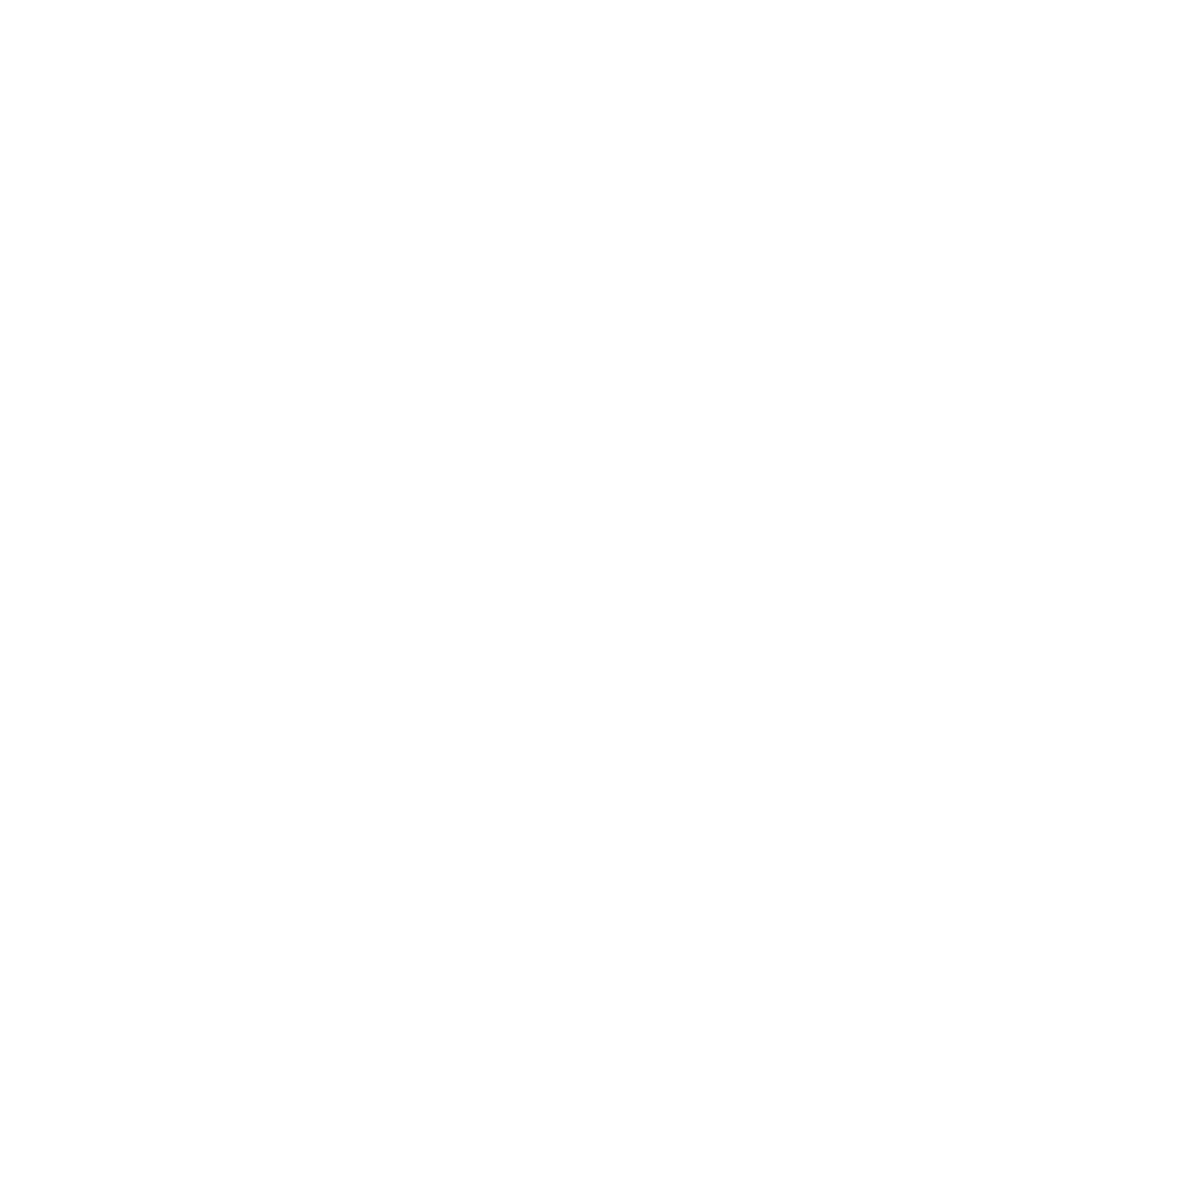

In [24]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
response=requests.get('https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page=2',headers=headers,verify=False).text
print(response)

In [25]:
soup = BeautifulSoup(response,"lxml")

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <style>
   @media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}
  </style>
  <script>
   window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date),window.initialDate=(new Date).toISOString()
  </script>
  <script type="text/partytown">
   window.dataLayer = window.dataLayer || [];
      window.gtag = function() {
      	window.dataLayer.push(arguments);
      };
      gtag('js', new Date(window.initialDate));
  </script>
  <title>
   List of companies in India | AmbitionBox
  </title>
  <meta content="2024 AmbitionBox" data-n-head="ssr" name="copyright"/>
  <meta content="1 day" data-n-he
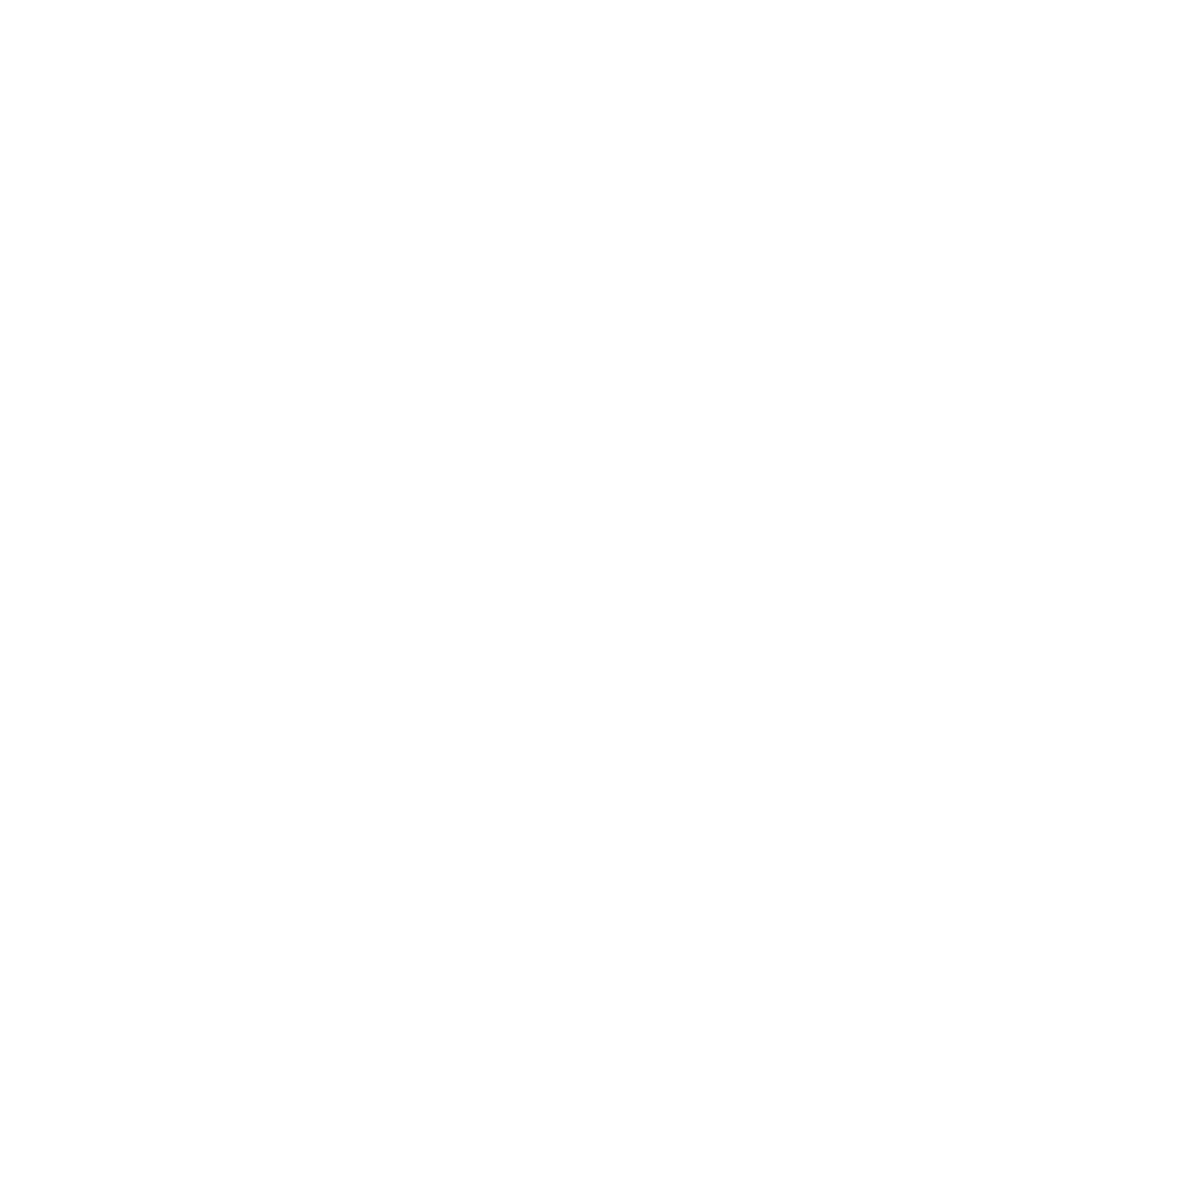

In [26]:
print(soup.prettify())

In [27]:
for i in soup.findAll('h2'):
    print(i.text.strip())

Vodafone Idea
BYJU'S
Kotak Mahindra Bank
Deloitte
Reliance Industries
iEnergizer
Bharti Airtel
Tata Motors
WNS
Flipkart
IndusInd Bank
Ernst & Young
AU Small Finance Bank
Mahindra & Mahindra
Infosys BPM
DXC Technology
IDFC FIRST Bank
Conneqt Business Solutions
LTIMindtree
HDFC Life
Companies by  Industry
Companies by  Locations
Companies by  Type
Companies by  Badges


In [34]:
# soup.finAll('div', class_='companyCardWrapper__companyRatingWrapper')
#print(i.text.strip())
for i in soup.find_all('span',class_='companyCardWrapper__companyRatingValue'):
    print(i.text)


4.2
3.1
3.9
3.9
4.1
4.7
4.1
4.2
3.5
4.1
3.7
3.6
4.4
4.2
3.8
3.8
4.0
3.7
3.6
4.1


In [59]:
company=soup.find_all('div',class_='companyCardWrapper')
len(company)

20

In [63]:
names=[]
rating=[]
review=[]
for i in company:
    name=i.find('h2').text.strip()
    rating.append(i.find_all('span',class_='companyCardWrapper__companyRatingValue')[0].text)
    review.append(i.find_all('span',class_='companyCardWrapper__ActionCount')[0].text)
    names.append(name)
print(names)
print(rating)
print(review)

['Vodafone Idea', "BYJU'S", 'Kotak Mahindra Bank', 'Deloitte', 'Reliance Industries', 'iEnergizer', 'Bharti Airtel', 'Tata Motors', 'WNS', 'Flipkart', 'IndusInd Bank', 'Ernst & Young', 'AU Small Finance Bank', 'Mahindra & Mahindra', 'Infosys BPM', 'DXC Technology', 'IDFC FIRST Bank', 'Conneqt Business Solutions', 'LTIMindtree', 'HDFC Life']
['4.2', '3.1', '3.9', '3.9', '4.1', '4.7', '4.1', '4.2', '3.5', '4.1', '3.7', '3.6', '4.4', '4.2', '3.8', '3.8', '4.0', '3.7', '3.6', '4.1']
['15.6k', '15.3k', '14.8k', '14.6k', '14.1k', '15.5k', '12.6k', '10.9k', '10k', '9.6k', '9.5k', '9.4k', '8.9k', '9k', '8.6k', '8.6k', '8.7k', '8.2k', '8.3k', '8k']


In [64]:
df=pd.DataFrame({'name':names,'rating':rating,'review':review})

In [65]:
df

,name,rating,review
0,Vodafone Idea,4.2,15.6k
1,BYJU'S,3.1,15.3k
2,Kotak Mahindra Bank,3.9,14.8k
3,Deloitte,3.9,14.6k
4,Reliance Industries,4.1,14.1k
5,iEnergizer,4.7,15.5k
6,Bharti Airtel,4.1,12.6k
7,Tata Motors,4.2,10.9k
8,WNS,3.5,10k
9,Flipkart,4.1,9.6k


In [67]:
names=[]
rating=[]
review=[]
for i in range(1,10):
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
    response=requests.get('https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page={}'.format(i),headers=headers,verify=False).text
    soup = BeautifulSoup(response,"lxml")
    company=soup.find_all('div',class_='companyCardWrapper')
    for j in company:
        name=j.find('h2').text.strip()
        rating.append(j.find_all('span',class_='companyCardWrapper__companyRatingValue')[0].text)
        review.append(j.find_all('span',class_='companyCardWrapper__ActionCount')[0].text)
        names.append(name)
df=pd.DataFrame({'name':names,'rating':rating,'review':review})
print(df)

c:\Users\baps\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ambitionbox.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\baps\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ambitionbox.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\baps\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ambitionbox.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-

                       name rating review
0                       TCS    3.8  76.4k
1                 Accenture    4.0  48.3k
2                 Cognizant    3.9  43.6k
3                     Wipro    3.8    41k
4                 Capgemini    3.8  35.5k
..                      ...    ...    ...
175                  Abbott    4.2   2.9k
176  VE Commercial Vehicles    4.1   2.8k
177  Indian Oil Corporation    4.5   2.9k
178             Whitehat jr    3.5   2.8k
179              Ford Motor    4.5   2.8k

[180 rows x 3 columns]


In [68]:
print(df)

                       name rating review
0                       TCS    3.8  76.4k
1                 Accenture    4.0  48.3k
2                 Cognizant    3.9  43.6k
3                     Wipro    3.8    41k
4                 Capgemini    3.8  35.5k
..                      ...    ...    ...
175                  Abbott    4.2   2.9k
176  VE Commercial Vehicles    4.1   2.8k
177  Indian Oil Corporation    4.5   2.9k
178             Whitehat jr    3.5   2.8k
179              Ford Motor    4.5   2.8k

[180 rows x 3 columns]
